# k-means Clustering of Movie Ratings

Say you're a data analyst at Netflix and you want to explore the similarities and differences in people's tastes in movies based on how they rate different movies. Can understanding these ratings contribute to a movie recommendation system for users? Let's dig into the data and see.

The data we'll be using comes from the wonderful [MovieLens](https://movielens.org/) [user rating dataset](https://grouplens.org/datasets/movielens/). We'll be looking at individual movie ratings later in the notebook, but let us start with how ratings of genres compare to each other.

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import the ratings dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
#Now that we know the structure of our dataset, how many records do we have in each of these tables?
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


## Romance vs. Scifi
Let's start by taking a subset of users, and seeing what their preferred genres are. We're hiding the most data preprocessing in helper functions so the focus is on the topic of clustering. It would be useful if you skim helper.py to see how these helper functions are implemented after finishing this notebook.

In [4]:
# Calculate the average rating of romance and scifi movies
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculated each user's average rating of all romance movies and all scifi movies. Let's bias our dataset a little by removing people who like both scifi and romance, just so that our clusters tend to define them as liking one genre more than the other.

In [5]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


So we can see we have 183 users, and for each user we have their average rating of the romance and sci movies they've watched.

Let us plot this dataset:

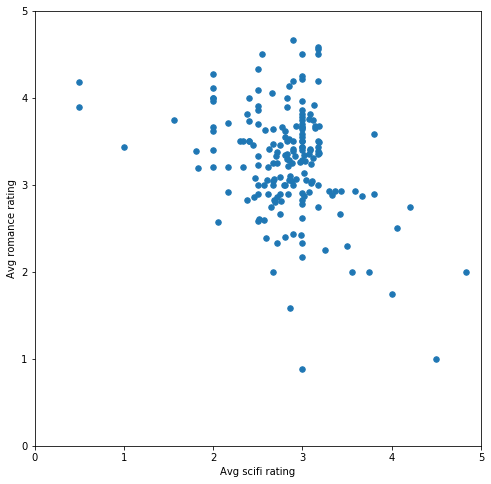

In [6]:
%matplotlib inline


helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

We can see come clear bias in this sample (that we created on purpose). How would it look if we break the sample down into two groups using k-means?

In [7]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
print(X)

[[ 2.4   3.5 ]
 [ 3.14  3.65]
 [ 2.75  2.9 ]
 [ 3.36  2.93]
 [ 2.62  2.89]
 [ 2.51  2.61]
 [ 3.12  3.31]
 [ 3.07  3.76]
 [ 3.17  3.  ]
 [ 3.    0.88]
 [ 2.83  3.3 ]
 [ 2.17  2.92]
 [ 3.    4.25]
 [ 2.7   3.33]
 [ 2.    3.96]
 [ 3.12  3.75]
 [ 2.65  2.75]
 [ 3.09  3.41]
 [ 3.43  2.93]
 [ 2.72  2.33]
 [ 2.5   4.33]
 [ 2.77  3.67]
 [ 2.89  3.  ]
 [ 2.93  3.68]
 [ 3.02  2.87]
 [ 2.38  3.81]
 [ 4.06  2.5 ]
 [ 3.17  3.35]
 [ 3.    2.17]
 [ 0.5   4.18]
 [ 3.14  3.68]
 [ 2.75  3.09]
 [ 3.    4.22]
 [ 2.    3.4 ]
 [ 3.18  3.39]
 [ 2.98  2.42]
 [ 2.67  3.  ]
 [ 2.57  2.6 ]
 [ 2.55  4.5 ]
 [ 3.59  2.93]
 [ 3.02  3.14]
 [ 3.17  4.56]
 [ 2.5   4.09]
 [ 3.    3.29]
 [ 2.83  3.89]
 [ 2.99  2.91]
 [ 2.5   3.  ]
 [ 3.    4.5 ]
 [ 3.    3.4 ]
 [ 3.17  3.44]
 [ 3.04  3.06]
 [ 2.5   3.86]
 [ 3.    3.78]
 [ 3.19  3.68]
 [ 2.67  3.25]
 [ 2.8   3.62]
 [ 2.84  2.9 ]
 [ 2.    3.2 ]
 [ 3.33  2.88]
 [ 2.97  3.26]
 [ 2.9   2.44]
 [ 2.85  3.53]
 [ 3.    2.83]
 [ 2.83  3.35]
 [ 3.07  2.92]
 [ 3.    2.78]
 [ 1.    3

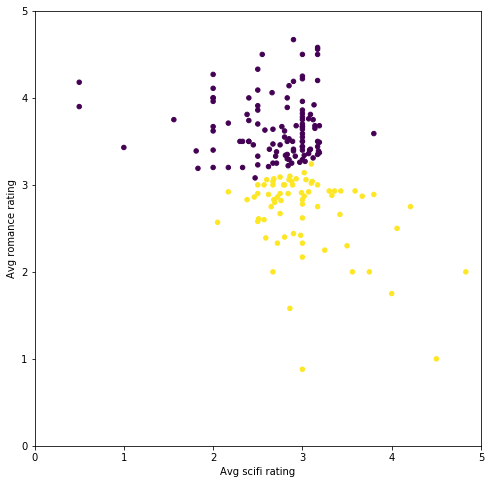

In [8]:
# TODO: Import KMeans
from sklearn.cluster import KMeans 

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X) 

# Plot
helper.draw_clusters(biased_dataset, predictions)

We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 stars, then they belong to one group. Otherwise, they belong to the other group.

What would happen if we break them down into three groups?

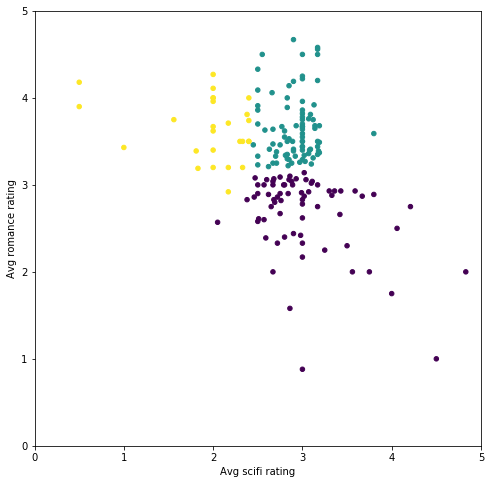

In [9]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

Now the average scifi rating is starting to come into play. The groups are:
 * people who like romance but not scifi
 * people who like scifi but not romance
 * people who like both scifi and romance
 
Let's add one more group

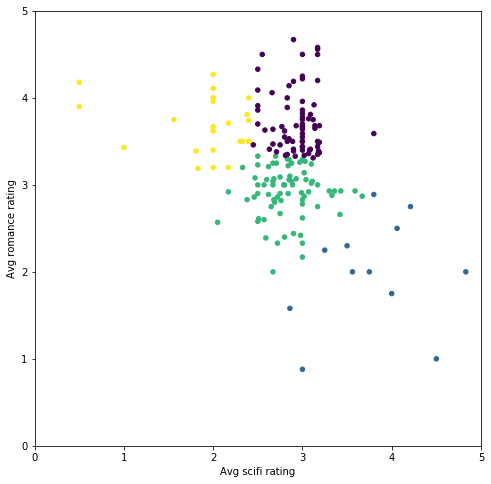

In [10]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

We can see that the more clusters we break our dataset down into, the more similar the tastes of the population of each cluster to each other.

## Choosing K
Great, so we can cluster our points into any number of clusters. What's the right number of clusters for this dataset?

There are [several](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) ways of choosing the number of clusters, k. We'll look at a simple one called "the elbow method". The elbow method works by plotting the ascending values of k versus the total error calculated using that k. 

How do we calculate total error?
One way to calculate the error is squared error. Say we're calculating the error for k=2. We'd have two clusters each having one "centroid" point. For each point in our dataset, we'd subtract its coordinates from the centroid of the cluster it belongs to. We then square the result of that subtraction (to get rid of the negative values), and sum the values. This would leave us with an error value for each point. If we sum these error values, we'd get the total error for all points when k=2.

Our mission now is to do the same for each k (between 1 and, say, the number of elements in our dataset)

In [11]:
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


In [12]:
# Optional: Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.35588178764728268),
 (7, 0.39237067416617283),
 (12, 0.34608523074939834),
 (17, 0.37118066269176092),
 (22, 0.36819625124741168),
 (27, 0.37188732882579301),
 (32, 0.36966299621245802),
 (37, 0.37004834499690037),
 (42, 0.38367033996933514),
 (47, 0.36154063598748054),
 (52, 0.3662705857915674),
 (57, 0.35299351352755076),
 (62, 0.35715264166266514),
 (67, 0.33523876409972059),
 (72, 0.33099595760917411),
 (77, 0.33862754309753795),
 (82, 0.33278839592029641),
 (87, 0.3357124775212767),
 (92, 0.32513653246991947),
 (97, 0.32115760923143111),
 (102, 0.28899212124507473),
 (107, 0.29956697005711269),
 (112, 0.28559195808114035),
 (117, 0.27772719175238347),
 (122, 0.25722268058729386),
 (127, 0.25752948541866844),
 (132, 0.25461790714552368),
 (137, 0.23529209684986269),
 (142, 0.21604936783574849),
 (147, 0.2098240384373482),
 (152, 0.18722856283664085),
 (157, 0.16781221204619262),
 (162, 0.1556499460287056),
 (167, 0.12820427579529109),
 (172, 0.10075966098920461),
 (177, 0.06

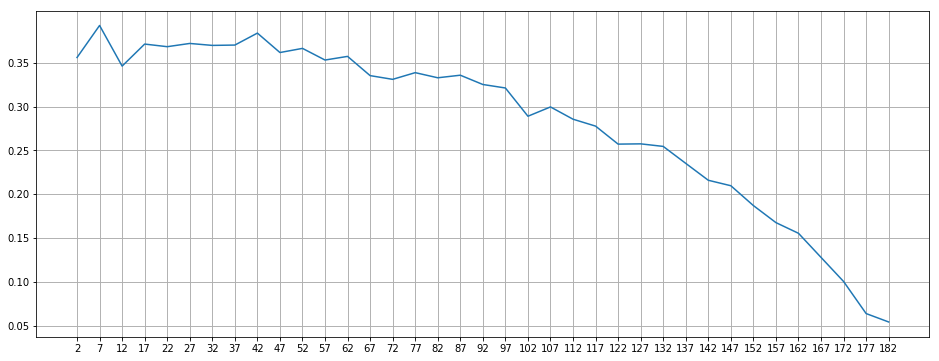

In [13]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choices for k include 7, 22, 27, 32, amongst other values (with a slight variation between different runs). Increasing the number of clusters (k) beyond that range starts to result in worse clusters (according to Silhouette score)

My pick would be k=7 because it's easier to visualize:

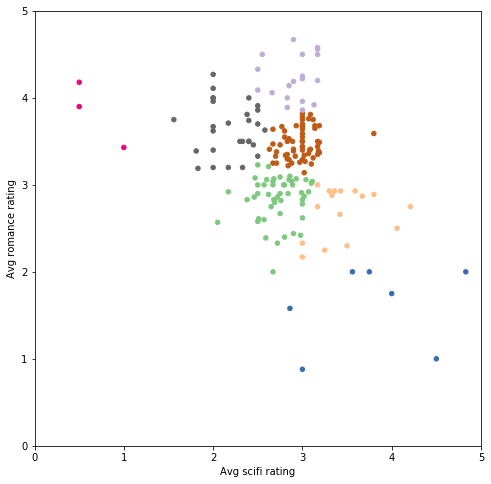

In [14]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

Note: As you try to plot larger values of k (more than 10), you'll have to make sure your plotting library is not reusing colors between clusters. For this plot, we had to use the [matplotlib colormap](https://matplotlib.org/examples/color/colormaps_reference.html) 'Accent' because other colormaps either did not show enough contrast between colors, or were recycling colors past 8 or 10 clusters.


## Throwing some Action into the mix
So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

Our dataset now looks like this:

In [15]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [17]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                                           'avg_romance_rating', 
                                                           'avg_action_rating']].values